In [2]:
%load_ext lab_black
import pandas as pd
import numpy as np
import os
import glob
import tqdm


The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [22]:
# some preprocessing of all csv's to get standardized pickle dataframes
# adding some date related features, and making sure the target column names are renamed to "target_xxxx"
# all casing to lower underscores

for file in glob.glob("./data/kaggle-original/*.csv"):
    df = pd.read_csv(file, parse_dates=["Date"], dayfirst=True, index_col=["Date"])
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["week"] = df.index.isocalendar().week
    df["day"] = df.index.day
    df["day_of_year"] = df.index.dayofyear

    df = df.sort_index()

    for column in df.columns:
        if column in [
            "Depth_to_Groundwater_SAL",
            "Depth_to_Groundwater_COS",
            "Depth_to_Groundwater_LT2",
            "Flow_Rate_Bugnano",
            "Flow_Rate_Arbure",
            "Flow_Rate_Ermicciolo",
            "Flow_Rate_Galleria_Alta",
            "Depth_to_Groundwater_P24",
            "Depth_to_Groundwater_P25",
            "Depth_to_Groundwater_Pozzo_1",
            "Depth_to_Groundwater_Pozzo_2",
            "Depth_to_Groundwater_Pozzo_3",
            "Depth_to_Groundwater_Pozzo_4",
            "Depth_to_Groundwater_Pozzo_5",
            "Depth_to_Groundwater_Pozzo_6",
            "Depth_to_Groundwater_Pozzo_7",
            "Depth_to_Groundwater_Pozzo_8",
            "Depth_to_Groundwater_Pozzo_9 ",
            "Depth_to_Groundwater_Podere_Casetta",
            "Hydrometry_Nave_di_Rosano",
            "Lake_Level",
            "Flow_Rate",
        ]:
            df.rename(columns={column: "target_{}".format(column)}, inplace=True)
    df.columns = df.columns.str.lower()
    target_name = file.split("/")[-1].split(".")[0]
    df.to_pickle("./data/kaggle-preprocessed/{}.pkl".format(target_name.lower()))

In [455]:
for file in glob.glob("./data/kaggle-preprocessed/wa*.pkl"):
    df = pd.read_pickle(file)

In [456]:
for col in df.columns:
    if "target" in col:
        #         plt.show()
        print(col)
#         df[col].plot()

target_flow_rate_bugnano
target_flow_rate_arbure
target_flow_rate_ermicciolo
target_flow_rate_galleria_alta


In [470]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(df.target_flow_rate_galleria_alta.ffill().bfill().values.reshape(-1, 1))

array([1, 1, 1, ..., 1, 1, 1])

In [471]:
clf.negative_outlier_factor_

array([-1., -1., -1., ..., -1., -1., -1.])

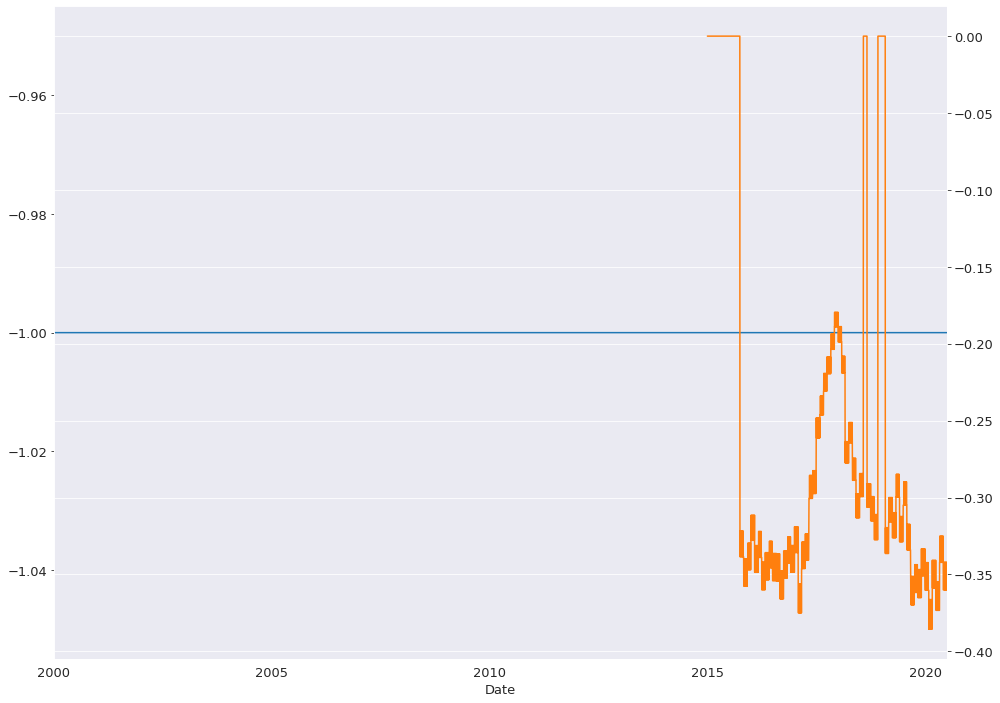

In [472]:
s = pd.Series(clf.negative_outlier_factor_)
s.index = df.index
s.plot()
df.target_flow_rate_bugnano.plot(secondary_y=True)